<a href="https://colab.research.google.com/github/chamznator/ML-projects/blob/main/Presidential_Speech_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
32% [1 libcudnn8 169 MB/420 MB 40%]^C


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras import regularizers
import csv
import pandas as pd 
from keras.callbacks import *

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2b05a7e5-7876-6c01-7f29-0f8f0d3f9373)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json  ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download littleotter/united-states-presidential-speeches

united-states-presidential-speeches.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip united-states-presidential-speeches

Archive:  united-states-presidential-speeches.zip
replace corpus.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df1 = pd.read_csv('presidential_speeches.csv', delimiter=',')

In [ ]:
df1.head(5)

,Date,President,Party,Speech Title,Summary,Transcript,URL
0,1789-04-30,George Washington,Unaffiliated,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...
1,1789-10-03,George Washington,Unaffiliated,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...
2,1790-01-08,George Washington,Unaffiliated,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
3,1790-12-08,George Washington,Unaffiliated,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
4,1790-12-29,George Washington,Unaffiliated,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...


In [ ]:
df1.tail(410)

,Date,President,Party,Speech Title,Summary,Transcript,URL
582,1953-01-15,Harry S. Truman,Democratic,Farewell Address,In his farewell address to the American people...,My fellow Americans: I am happy to have this o...,https://millercenter.org/the-presidency/presid...
583,1953-01-20,Dwight D. Eisenhower,Republican,First Inaugural Address,Eisenhower challenges citizens to help lead th...,"My friends, before I begin the expression of t...",https://millercenter.org/the-presidency/presid...
584,1953-04-16,Dwight D. Eisenhower,Republican,Chance for Peace,Eisenhower gives this speech before the Americ...,In this spring of 1953 the free world weighs o...,https://millercenter.org/the-presidency/presid...
585,1953-12-08,Dwight D. Eisenhower,Republican,Atoms for Peace,Before the General Assembly of the United Nati...,"Madame President, Members of the General Assem...",https://millercenter.org/the-presidency/presid...
586,1956-08-23,Dwight D. Eisenhower,Republican,Republican National Convention,Eisenhower accepts the Republican nomination f...,"Chairman Martin, Delegates and Alternates to t...",https://millercenter.org/the-presidency/presid...
...,...,...,...,...,...,...,...
987,2019-01-19,Donald Trump,Republican,Remarks about the US Southern Border,President Donald Trump speaks about what he se...,"Just a short time ago, I had the honor of pres...",https://millercenter.org/the-presidency/presid...
988,2019-02-05,Donald Trump,Republican,State of the Union Address,"In his second State of the Union Address, Pres...","Madam Speaker, Mr. Vice President, Members of ...",https://millercenter.org/the-presidency/presid...
989,2019-02-15,Donald Trump,Republican,Speech Declaring a National Emergency,President Donald Trump declares a national eme...,"Thank you very much, everybody. Before we begi...",https://millercenter.org/the-presidency/presid...
990,2019-09-24,Donald Trump,Republican,Remarks at the United Nations General Assembly,President Donald Trump speaks to the 74th sess...,"Thank you very much. Mr. President, Mr. Secret...",https://millercenter.org/the-presidency/presid...


In [ ]:
df1.tail(250)

,Date,President,Party,Speech Title,Summary,Transcript,URL
742,1976-10-06,Jimmy Carter,Democratic,Debate with President Gerald Ford (Foreign and...,NaN,Good evening. I am Pauline Frederick of NPR [ ...,https://millercenter.org/the-presidency/presid...
743,1976-10-22,Jimmy Carter,Democratic,Debate with President Gerald Ford,NaN,"Good evening, I am Barbara Walters, moderator ...",https://millercenter.org/the-presidency/presid...
744,1977-01-12,Gerald Ford,Republican,State of the Union Address,NaN,"Mr. Speaker, Mr. Vice President, members of th...",https://millercenter.org/the-presidency/presid...
745,1977-01-20,Jimmy Carter,Democratic,Inaugural Address,President Carter notes that the nation must be...,"For myself and for our Nation, I want to thank...",https://millercenter.org/the-presidency/presid...
746,1977-02-02,Jimmy Carter,Democratic,Report to the American People on Energy,President Carter speaks to the American people...,Good evening. Tomorrow will be two weeks since...,https://millercenter.org/the-presidency/presid...
...,...,...,...,...,...,...,...
987,2019-01-19,Donald Trump,Republican,Remarks about the US Southern Border,President Donald Trump speaks about what he se...,"Just a short time ago, I had the honor of pres...",https://millercenter.org/the-presidency/presid...
988,2019-02-05,Donald Trump,Republican,State of the Union Address,"In his second State of the Union Address, Pres...","Madam Speaker, Mr. Vice President, Members of ...",https://millercenter.org/the-presidency/presid...
989,2019-02-15,Donald Trump,Republican,Speech Declaring a National Emergency,President Donald Trump declares a national eme...,"Thank you very much, everybody. Before we begi...",https://millercenter.org/the-presidency/presid...
990,2019-09-24,Donald Trump,Republican,Remarks at the United Nations General Assembly,President Donald Trump speaks to the 74th sess...,"Thank you very much. Mr. President, Mr. Secret...",https://millercenter.org/the-presidency/presid...


In [ ]:
print(df1['Speech Title'].value_counts())

State of the Union Address                          42
First Annual Message                                25
Inaugural Address                                   23
Second Annual Message                               22
Third Annual Message                                21
                                                    ..
Message Regarding US-Cuban Commercial Convention     1
Message Regarding the Panamanian Revolution          1
Message Regarding Treaty with Panama                 1
Proclamation Declaring US Neutrality                 1
Remarks at the United Nations General Assembly       1
Name: Speech Title, Length: 716, dtype: int64


In [ ]:
df1.iloc[988]

Date                                                   2019-02-05
President                                            Donald Trump
Party                                                  Republican
Speech Title                           State of the Union Address
Summary         In his second State of the Union Address, Pres...
Transcript      Madam Speaker, Mr. Vice President, Members of ...
URL             https://millercenter.org/the-presidency/presid...
Name: 988, dtype: object

In [ ]:
nRow, nCol = df1.shape

In [ ]:

print(nRow)
print(nCol)

992
7


In [ ]:
with open("presidential_speeches.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

Date,President,Party,Speech Title,Summary,Transcript,URL

Each data point looks like this:

1789-04-30,George Washington,Unaffiliated,First Inaugural Address,"Washington calls on Congress to avoid local and party partisanship and encourages the adoption of a Bill of Rights, without specifically calling them by name. The first President demonstrates his reluctance to accept the post, rejects any salary for the execution of his duties, and devotes a considerable part of the speech to his religious beliefs.","Fellow Citizens of the Senate and the House of Representatives: Among the vicissitudes incident to life, no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the fourteenth day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilectio

In [ ]:
with open("presidential_speeches.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')

# Function to extract speeches from csvs

In [ ]:
def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file, Stores names of presidents, party(dems/republicans), speech(transript)
    
    Args:
        filename (string): path to the CSV file
    
    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    speeches = []
    names = []
    party=[]
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            names.append(row[1])
            party.append(row[2])
            speeches.append(row[5])

    return speeches, names, party

In [ ]:
import sys
csv.field_size_limit(sys.maxsize)

# Test the functions
speeches, names, party  = parse_data_from_file("presidential_speeches.csv")

print(f"There are {len(speeches)} speeches in the dataset.\n")




There are 992 speeches in the dataset.



In [ ]:
speeches[900]

"Thank you all very much. Please be seated. Thanks for the warm welcome, and thanks for inviting me to join you in this 20th anniversary of the National Endowment for Democracy. The staff and directors of this organization have seen a lot of history over the last two decades, you've been a part of that history. By speaking for and standing for freedom, you've lifted the hopes of people around the world, and you've brought great credit to America. I appreciate Vin for the short introduction. be: ( 1 a man who likes short introductions. And he didn't let me down. But more importantly, I appreciate the invitation. I appreciate the members of Congress who are here, senators from both political parties, members of the House of Representatives from both political parties. I appreciate the ambassadors who are here. I appreciate the guests who have come. I appreciate the bipartisan spirit, the nonpartisan spirit of the National Endowment for Democracy. be: ( 1 glad that Republicans and Democra

In [ ]:
names[900]

'George W. Bush'

In [ ]:
speeches[900].split('.')

['Thank you all very much',
 ' Please be seated',
 ' Thanks for the warm welcome, and thanks for inviting me to join you in this 20th anniversary of the National Endowment for Democracy',
 " The staff and directors of this organization have seen a lot of history over the last two decades, you've been a part of that history",
 " By speaking for and standing for freedom, you've lifted the hopes of people around the world, and you've brought great credit to America",
 ' I appreciate Vin for the short introduction',
 ' be: ( 1 a man who likes short introductions',
 " And he didn't let me down",
 ' But more importantly, I appreciate the invitation',
 ' I appreciate the members of Congress who are here, senators from both political parties, members of the House of Representatives from both political parties',
 ' I appreciate the ambassadors who are here',
 ' I appreciate the guests who have come',
 ' I appreciate the bipartisan spirit, the nonpartisan spirit of the National Endowment for Dem

In [ ]:
def paragraphs_to_sentences(paragraphs):

  sentenceList=[]

  for paragraph in paragraphs:
      sentences = paragraph.lower().split('.')
      print(len(sentences))
      for sentence in sentences:
        sentenceList.append(sentence)

      
     

  return sentenceList

In [ ]:
sentenceList=paragraphs_to_sentences(speeches[-250:])

783
776
217
53
176
305
163
163
35
124
254
35
189
37
161
210
167
59
167
42
202
243
880
100
130
221
127
152
183
174
196
158
494
106
260
198
192
189
169
133
65
266
238
189
236
214
131
418
56
54
294
47
118
125
100
273
1101
272
124
229
53
150
47
175
59
181
151
53
203
113
136
52
118
231
308
261
285
409
231
19
350
200
148
294
146
43
204
82
84
204
147
77
89
231
47
182
638
325
346
1360
76
193
201
92
106
38
296
198
54
46
59
352
109
204
121
399
70
38
461
56
280
216
155
153
356
99
341
139
160
106
352
61
53
369
113
97
36
399
97
80
405
55
96
63
61
59
83
37
183
162
216
172
73
60
179
309
110
30
194
160
121
280
170
270
101
243
73
149
116
278
86
159
292
227
313
176
218
36
80
165
48
438
121
112
32
114
291
68
311
277
231
211
427
230
272
174
193
136
144
203
343
142
421
74
275
189
98
236
50
423
241
107
105
89
202
357
276
303
195
79
226
113
303
363
121
379
213
189
353
241
369
89
257
195
349
213
202
234
323
431
39
873
375
544
221
88
290
805
230
555


In [ ]:
numbers=[1,2,3,4,5]

In [ ]:
print(numbers)

[1, 2, 3, 4, 5]


In [ ]:
sentenceList[10000]

' a little over a year ago, hoping to build on the camp david accords, which had led to peace between israel and egypt, i proposed a peace plan for the middle east to end the wars between the arab states and israel'

Shortening the setence list so sentences max have 25 words.


In [ ]:
short_sentenceList=[x for x in sentenceList if (len(x)<=50 and len(x)>=25)]

In [ ]:
len(short_sentenceList)

8348

In [ ]:
for sentence in short_sentenceList[0:50]:
  print(sentence)
  print(len(sentence))
  #print("\n")


 his opponent will have up to 2 minutes to respond
50
 and i hope tonight that i and mr
33
 it's been one of secrecy and exclusion
39
 and the last point i want to make is this: mr
46
 kissinger has been the president of this country
49
 now let me just tell you a little story
40
 that's the kind of a defense program that mr
45
 and the kind of a defense program that mr
42
 trewhitt, a question for president ford
40
 we have a democracy in portugal today
38
 we wanted to end the bloodshed in southern africa
50
 serve human dignity in southern africa
39
 about a year ago, he cut the pentagon budget $ 6
49
 ford added back another $ 1 1/2 billion
40
8 billion in the defense budget
31
 valeriani, a question for governor carter
42
 but i have an adequate background, i believe
45
 i am a graduate of the in 1881
31
 i've talked to them, and i've listened
39
 i believe i know what this country ought to be
47
 ford and kissinger have done
29
 kissinger that he could not reveal
35
 these kinds 

In [ ]:
short_sentenceList[5]

' now let me just tell you a little story'

In [ ]:
len(short_sentenceList[5])

40

In [ ]:
tokenizer1 = Tokenizer(num_words=3000)
tokenizer1.fit_on_texts(sentenceList)
total_words = len(tokenizer1.word_index) + 1

In [ ]:
total_words

21977

**Testing sequence outputs**

In [ ]:
short_sentenceList[0:3]

[' his opponent will have up to 2 minutes to respond',
 ' and i hope tonight that i and mr',
 " it's been one of secrecy and exclusion"]

In [ ]:

def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences
    
    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    
    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []
    
    ### START CODE HERE
    for sentence in corpus:
       items= tokenizer.texts_to_sequences([sentence])[0]
	    
       for i in range(0, len(items)):
       
          if i<=13:
            n_gram_sequence = items[:i+1]
            input_sequences.append(n_gram_sequence)
          
        
    ### END CODE HERE
    
    return input_sequences

In [ ]:
first_example_sequence = n_gram_seqs([short_sentenceList[0]], tokenizer1)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[117],
 [117, 1672],
 [117, 1672, 18],
 [117, 1672, 18, 13],
 [117, 1672, 18, 13, 78],
 [117, 1672, 18, 13, 78, 3],
 [117, 1672, 18, 13, 78, 3, 359],
 [117, 1672, 18, 13, 78, 3, 359, 1648],
 [117, 1672, 18, 13, 78, 3, 359, 1648, 3],
 [117, 1672, 18, 13, 78, 3, 359, 1648, 3, 1270]]

In [ ]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(short_sentenceList, tokenizer1)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 55017
maximum length of sequences is: 12


In [ ]:
input_sequences[0:5]

[[117],
 [117, 1672],
 [117, 1672, 18],
 [117, 1672, 18, 13],
 [117, 1672, 18, 13, 78]]

# Padding the Sequences

In [ ]:
# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length
    
    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    ### START CODE HERE
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlen, padding='pre'))
    
    return padded_sequences
    ### END CODE HERE

Pad first example

In [ ]:
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,  117],
       [   0,    0,    0,    0,    0,    0,    0,    0,  117, 1672],
       [   0,    0,    0,    0,    0,    0,    0,  117, 1672,   18],
       [   0,    0,    0,    0,    0,    0,  117, 1672,   18,   13],
       [   0,    0,    0,    0,    0,  117, 1672,   18,   13,   78],
       [   0,    0,    0,    0,  117, 1672,   18,   13,   78,    3],
       [   0,    0,    0,  117, 1672,   18,   13,   78,    3,  359],
       [   0,    0,  117, 1672,   18,   13,   78,    3,  359, 1648],
       [   0,  117, 1672,   18,   13,   78,    3,  359, 1648,    3],
       [ 117, 1672,   18,   13,   78,    3,  359, 1648,    3, 1270]],
      dtype=int32)

**Pad the whole dataset**

In [ ]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (55017, 12)


## Split Data into features and Labels

In [ ]:
# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams
    
    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size
    
    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """
    ### START CODE HERE
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)
    ### END CODE HERE

    return features, one_hot_labels

In [ ]:
# Test your function with the padded n_grams_seq of the first example
first_features, first_labels = features_and_labels(first_padded_seq, 3000)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (10, 3000)

features look like this:



array([[   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  117],
       [   0,    0,    0,    0,    0,    0,    0,  117, 1672],
       [   0,    0,    0,    0,    0,    0,  117, 1672,   18],
       [   0,    0,    0,    0,    0,  117, 1672,   18,   13],
       [   0,    0,    0,    0,  117, 1672,   18,   13,   78],
       [   0,    0,    0,  117, 1672,   18,   13,   78,    3],
       [   0,    0,  117, 1672,   18,   13,   78,    3,  359],
       [   0,  117, 1672,   18,   13,   78,    3,  359, 1648],
       [ 117, 1672,   18,   13,   78,    3,  359, 1648,    3]],
      dtype=int32)

In [ ]:
features, labels = features_and_labels(input_sequences, 3000)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (55017, 11)
labels have shape: (55017, 3000)


# Inserting Pre-Trained Embedding using glove

In [ ]:
# Define path to file containing the embeddings
GLOVE_FILE = 'glove.6B.100d.txt'

# Initialize an empty embeddings index dictionary
GLOVE_EMBEDDINGS = {}

# Read file and fill GLOVE_EMBEDDINGS with its contents
with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [ ]:
test_word = 'dog'

test_vector = GLOVE_EMBEDDINGS[test_word]

print(f"Vector representation of word {test_word} looks like this:\n\n{test_vector}")

Vector representation of word dog looks like this:

[ 0.30817    0.30938    0.52803   -0.92543   -0.73671    0.63475
  0.44197    0.10262   -0.09142   -0.56607   -0.5327     0.2013
  0.7704    -0.13983    0.13727    1.1128     0.89301   -0.17869
 -0.0019722  0.57289    0.59479    0.50428   -0.28991   -1.3491
  0.42756    1.2748    -1.1613    -0.41084    0.042804   0.54866
  0.18897    0.3759     0.58035    0.66975    0.81156    0.93864
 -0.51005   -0.070079   0.82819   -0.35346    0.21086   -0.24412
 -0.16554   -0.78358   -0.48482    0.38968   -0.86356   -0.016391
  0.31984   -0.49246   -0.069363   0.018869  -0.098286   1.3126
 -0.12116   -1.2399    -0.091429   0.35294    0.64645    0.089642
  0.70294    1.1244     0.38639    0.52084    0.98787    0.79952
 -0.34625    0.14095    0.80167    0.20987   -0.86007   -0.15308
  0.074523   0.40816    0.019208   0.51587   -0.34428   -0.24525
 -0.77984    0.27425    0.22418    0.20164    0.017431  -0.014697
 -1.0235    -0.39695   -0.0056188  0.3

In [ ]:
# Initialize an empty numpy array with the appropriate size
EMBEDDINGS_MATRIX = np.zeros((3000, 100))

# Iterate all of the words in the vocabulary and if the vector representation for 
# each word exists within GloVe's representations, save it in the EMBEDDINGS_MATRIX array
for word,i in tokenizer1.word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None and i <3000:
        EMBEDDINGS_MATRIX[i] = embedding_vector
     

In [ ]:
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model
    
    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    ### START CODE HERE
    model.add(Embedding(3000, 100, input_length=max_sequence_len-1,weights=[EMBEDDINGS_MATRIX]))
    model.add(Bidirectional(LSTM(100,return_sequences = True)))
    model.add(LSTM(100))
    model.add(Dense(3000, activation='softmax'))
    
    
   
    

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    ### END CODE HERE

    return model

In [ ]:
# Get the untrained model
model = create_model(3000, max_sequence_len)



In [ ]:
filepath="/content/gdrive/My Drive/MyRNN/cp.ckpt"
checkpoint = ModelCheckpoint(filepath, save_weights_only=True,
                                                 verbose=1)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(features, labels, epochs=50, verbose=1, callbacks=callbacks_list )

Epoch 1/50
1720/1720 [==============================] - ETA: 0s - loss: 5.8490 - accuracy: 0.0682
Epoch 1: saving model to /content/gdrive/My Drive/MyRNN/cp.ckpt
1720/1720 [==============================] - 30s 12ms/step - loss: 5.8490 - accuracy: 0.0682
Epoch 2/50
1718/1720 [============================>.] - ETA: 0s - loss: 5.1856 - accuracy: 0.1180
Epoch 2: saving model to /content/gdrive/My Drive/MyRNN/cp.ckpt
1720/1720 [==============================] - 19s 11ms/step - loss: 5.1860 - accuracy: 0.1180
Epoch 3/50
1717/1720 [============================>.] - ETA: 0s - loss: 4.8813 - accuracy: 0.1413
Epoch 3: saving model to /content/gdrive/My Drive/MyRNN/cp.ckpt
1720/1720 [==============================] - 26s 15ms/step - loss: 4.8817 - accuracy: 0.1412
Epoch 4/50
1716/1720 [============================>.] - ETA: 0s - loss: 4.6740 - accuracy: 0.1530
Epoch 4: saving model to /content/gdrive/My Drive/MyRNN/cp.ckpt
1720/1720 [==============================] - 19s 11ms/step - loss: 4.6744

In [ ]:
#load the weights of trained model each time using checkpoints
#model.load_weights(filepath)

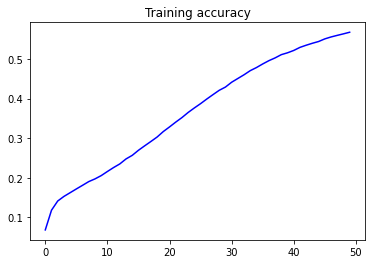

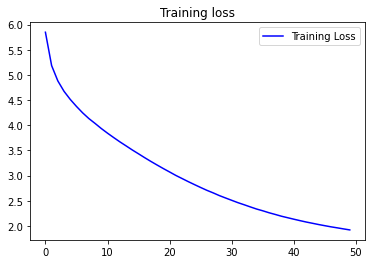

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
from random import randint
seed_text = "thank thank thank thank thank thank thank thank  thank Thank you speaker, I would like to talk about the economy"
next_words = 18
  

for i in range(25):

    for _ in range(next_words):
          # Convert the text into sequences
          token_list = tokenizer1.texts_to_sequences([seed_text])[0]
          # Pad the sequences
          token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
          # Get the probabilities of predicting a word
          predicted = model.predict(token_list, verbose=0)
          # Choose the next word based on the maximum probability
          predicted = np.argmax(predicted, axis=-1).item()
          # Get the actual word from the word index
          output_word = tokenizer1.index_word[predicted]
          # Append to the current text
          seed_text += " " + output_word
    
  
    word_list_tokens=tokenizer1.texts_to_sequences([seed_text])[0]
    words=[]
    for word in word_list_tokens:
      words.append(tokenizer1.index_word[word])#words is a list of words that are to be printed
    

    print(' '.join(words[9:]) + '\n')
    seed_text=' '.join(words[-9:])


  
    





thank you speaker i would like to talk about the economy mr being it should be come to end them education in the future we want to do that

way it forever do not work quickly absolutely to it can do it quickly absolutely them all about

things we pass it die all of that our country our country together and it must be stopped

close out tomorrow my party in the audience members of iraq q for americans do not there are

too possible in america made far before us out today is done since our time at home and

died here in the world power to care we do it together our country is it better absolutely

it quickly absolutely to do it done quickly do it done quickly it forever well behind it is

possible we it can be done it laughter as i get it forever set back that we do

not to do it quickly do it through all about this year was as well do a vote

not to 4 years to put the u you do it work was done in years to put

some some something very very very very best one country done it before for m

In [ ]:
! zip my_model